<h2><a href="https://leetcode.com/problems/path-with-maximum-probability">1514. Path with Maximum Probability</a></h2><h3>Medium</h3><hr><p>You are given an undirected weighted graph of&nbsp;<code>n</code>&nbsp;nodes (0-indexed), represented by an edge list where&nbsp;<code>edges[i] = [a, b]</code>&nbsp;is an undirected edge connecting the nodes&nbsp;<code>a</code>&nbsp;and&nbsp;<code>b</code>&nbsp;with a probability of success of traversing that edge&nbsp;<code>succProb[i]</code>.</p>

<p>Given two nodes&nbsp;<code>start</code>&nbsp;and&nbsp;<code>end</code>, find the path with the maximum probability of success to go from&nbsp;<code>start</code>&nbsp;to&nbsp;<code>end</code>&nbsp;and return its success probability.</p>

<p>If there is no path from&nbsp;<code>start</code>&nbsp;to&nbsp;<code>end</code>, <strong>return&nbsp;0</strong>. Your answer will be accepted if it differs from the correct answer by at most <strong>1e-5</strong>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<p><strong><img alt="" src="https://assets.leetcode.com/uploads/2019/09/20/1558_ex1.png" style="width: 187px; height: 186px;" /></strong></p>

<pre>
<strong>Input:</strong> n = 3, edges = [[0,1],[1,2],[0,2]], succProb = [0.5,0.5,0.2], start = 0, end = 2
<strong>Output:</strong> 0.25000
<strong>Explanation:</strong>&nbsp;There are two paths from start to end, one having a probability of success = 0.2 and the other has 0.5 * 0.5 = 0.25.
</pre>

<p><strong class="example">Example 2:</strong></p>

<p><strong><img alt="" src="https://assets.leetcode.com/uploads/2019/09/20/1558_ex2.png" style="width: 189px; height: 186px;" /></strong></p>

<pre>
<strong>Input:</strong> n = 3, edges = [[0,1],[1,2],[0,2]], succProb = [0.5,0.5,0.3], start = 0, end = 2
<strong>Output:</strong> 0.30000
</pre>

<p><strong class="example">Example 3:</strong></p>

<p><strong><img alt="" src="https://assets.leetcode.com/uploads/2019/09/20/1558_ex3.png" style="width: 215px; height: 191px;" /></strong></p>

<pre>
<strong>Input:</strong> n = 3, edges = [[0,1]], succProb = [0.5], start = 0, end = 2
<strong>Output:</strong> 0.00000
<strong>Explanation:</strong>&nbsp;There is no path between 0 and 2.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>2 &lt;= n &lt;= 10^4</code></li>
	<li><code>0 &lt;= start, end &lt; n</code></li>
	<li><code>start != end</code></li>
	<li><code>0 &lt;= a, b &lt; n</code></li>
	<li><code>a != b</code></li>
	<li><code>0 &lt;= succProb.length == edges.length &lt;= 2*10^4</code></li>
	<li><code>0 &lt;= succProb[i] &lt;= 1</code></li>
	<li>There is at most one edge between every two nodes.</li>
</ul>


## Using Maxheap in Djkstras algorithm
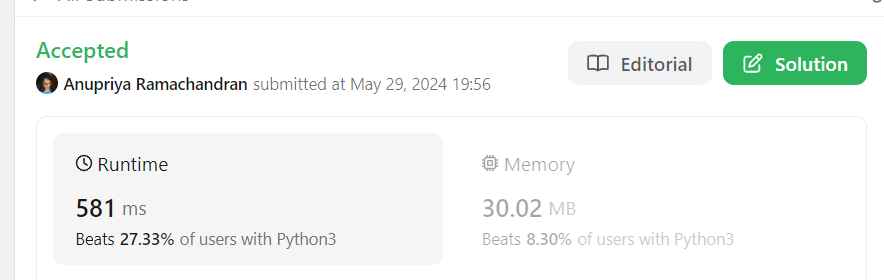

In [1]:
from collections import defaultdict
import heapq
from typing import List

class Solution:
    def maxProbability(self, n: int, edges: List[List[int]], succProb: List[float], start_node: int, end_node: int) -> float:
        
        adj = defaultdict(list)
        for i, nodes in enumerate(edges):    # Create adjacency list 
            print(nodes)
            u, v = nodes[0], nodes[1]
            adj[u].append((v, succProb[i]))
            adj[v].append((u, succProb[i]))

        prob_list = [0]* n    # Create prob list
        prob_list[start_node] = 1    # Assign prob as 1 to start_node (max prob)
        pq = []
        heapq.heappush(pq, (-1, start_node))     # Use MAXHEAP instead of minheap to store prob, since we need to find max prob to reach a node

        while pq: 
            probability, node = heapq.heappop(pq) 

            if node == end_node:     # Since we are given a end node, we need to return probabality at end node
                return -probability  

            for neighbours in adj[node]:
                curnode = neighbours[0]
                curprob = neighbours[1]

                if -probability * curprob > prob_list[curnode]:      # Probs will be multiplied (as per prob formula) instead of addition
                    prob_list[curnode] = -probability * curprob
                    heapq.heappush(pq, (-prob_list[curnode], curnode))

        return 0                   